In [1]:
from pandas import *
from matplotlib import pyplot as plt
from os import listdir

In [2]:
files = [file for file in listdir(r"C:\Users\HP\Desktop\sales")]

In [3]:
for file in files:
    print(r"C:/Users/HP/Desktop/sales/"+file)
    break

C:/Users/HP/Desktop/sales/Sales_April_2019.csv


In [4]:
df = DataFrame()
for file in files:
    sample = read_csv(r"C:/Users/HP/Desktop/sales/"+file)
    df = concat([df,sample],ignore_index=True)
    

In [5]:
df.shape

(186850, 6)

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
df = df.dropna(how="all")

In [8]:
df.shape

(186305, 6)

In [9]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### lets create a new column called month

In [11]:
df["Month"] = df["Order Date"].apply(lambda x : x[:2])

In [12]:
df["Month"].unique()

array(['04', '05', 'Or', '08', '09', '12', '01', '02', '03', '07', '06',
       '11', '10'], dtype=object)

In [13]:
filt = df["Month"] == "Or"
items = df.loc[filt].index
df = df.drop(items)

In [14]:
df["Month"].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [15]:
months = {"01":"Jan","02":"Feb","03":"Mar","04":"Apr","05":"May","06":"Jun","07":"Jul","08":"Aug"
         ,"09":"Sep","10":"Oct","11":"Nov","12":"Dec"}

In [16]:
df["Months"] = df["Month"].apply(lambda x :months[x])

In [17]:
df = df.sort_values(by=["Month"])

In [18]:
df.index = range(1,len(df.index)+1)

##  1,Best Month Sales

In [19]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Months'],
      dtype='object')

In [20]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype("int64")
df["Price Each"] = df["Price Each"].astype("float64")

In [21]:
df["Profit"] = df["Price Each"] * df["Quantity Ordered"]

In [22]:
df["Profit"]

1           2.99
2         150.00
3         389.99
4          14.95
5         300.00
           ...  
185946    149.99
185947      2.99
185948     11.99
185949     11.95
185950     14.95
Name: Profit, Length: 185950, dtype: float64

In [23]:
monthly_sales = df.groupby("Month")["Profit"].sum()

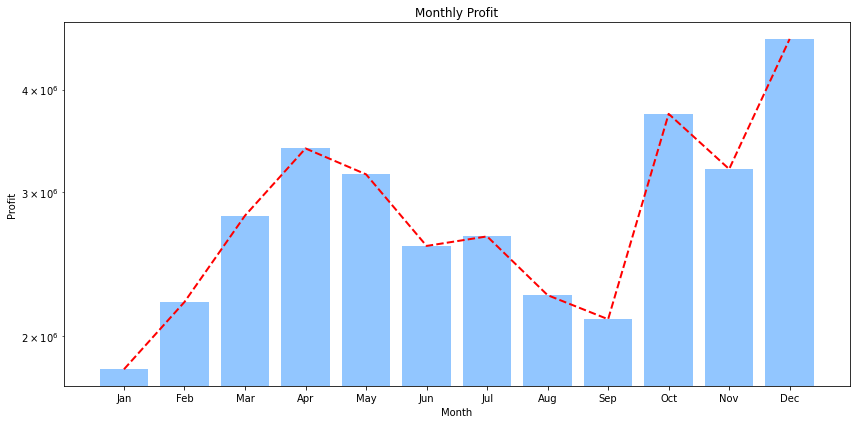

In [24]:
plt.style.use("seaborn-pastel")
plt.figure(figsize=(12,6))
plt.xlabel("Month")
plt.ylabel("Profit")
plt.title("Monthly Profit")
plt.bar([months[x] for x in monthly_sales.index],monthly_sales.values,log=True)
plt.plot([months[x] for x in monthly_sales.index],monthly_sales.values,lw=2,ls="--",c="r")
plt.tight_layout()
plt.show()

# Which city has the highest sales

## Creating a new column City

In [25]:
a = '532 River St, San Francisco, CA 94016'

In [26]:
a.split(",")[1]+a.split(",")[2][:3]

' San Francisco CA'

In [27]:
df["City"] = df["Purchase Address"].apply(lambda x:(x.split(",")[1]+x.split(",")[2][:3]))

In [28]:
citygrp = df.groupby("City")["Profit"].sum().sort_values(ascending=False)

In [29]:
citygrp

City
 San Francisco CA    8262203.91
 Los Angeles CA      5452570.80
 New York City NY    4664317.43
 Boston MA           3661642.01
 Atlanta GA          2795498.58
 Dallas TX           2767975.40
 Seattle WA          2747755.48
 Portland OR         1870732.34
 Austin TX           1819581.75
 Portland ME          449758.27
Name: Profit, dtype: float64

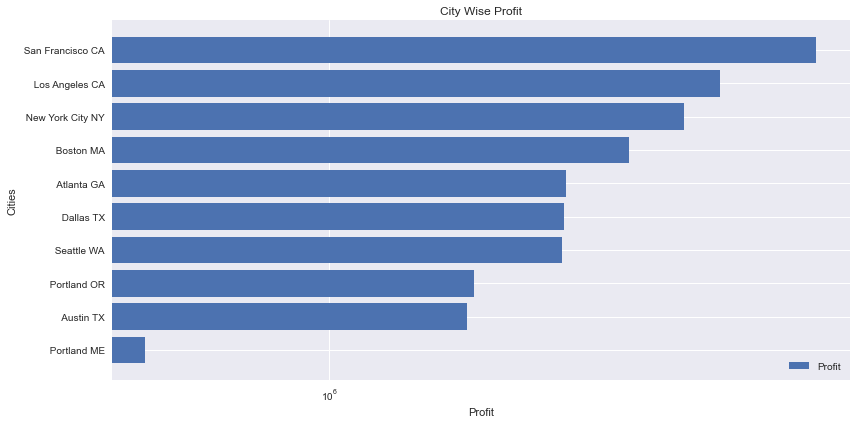

In [30]:
values = [value for value in citygrp]
cities = [city for city in citygrp.index]
cities.reverse()
values.reverse()
plt.style.use("seaborn")
plt.figure(figsize=(12,6))
plt.barh(cities,values,label="Profit",log=True)
plt.title("City Wise Profit")
plt.xlabel("Profit")
plt.ylabel("Cities")
plt.tight_layout()
plt.legend(loc="lower right")
plt.show()

## 3, Which product sold the most and why

In [31]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Months', 'Profit', 'City'],
      dtype='object')

In [32]:
product_grp = df.groupby(["Product"])["Quantity Ordered"].sum()

In [33]:
product_grp

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [34]:
average_product_price_grp = df.groupby("Product")["Price Each"].mean()

In [35]:
average_product_price_grp

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

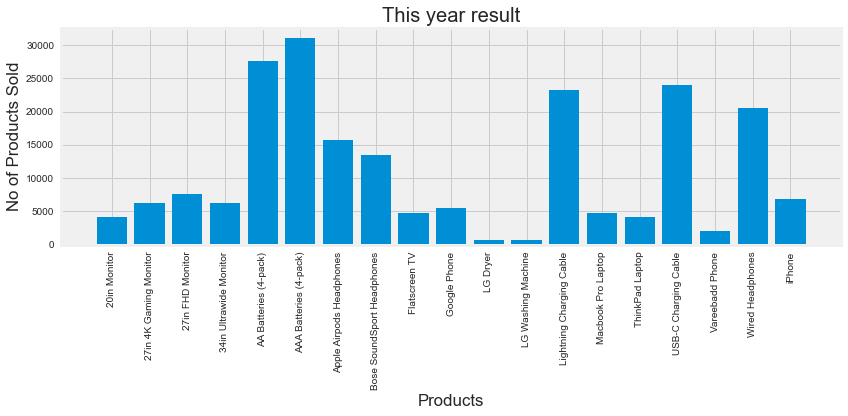

In [36]:
plt.figure(figsize=(12,6))
plt.style.use("fivethirtyeight")
plt.bar(product_grp.index,product_grp.values)
plt.xlabel("Products")
plt.ylabel("No of Products Sold")
plt.title("This year result")
plt.xticks(product_grp.index,rotation=90)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp/ipykernel_6912/829132210.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(product_grp.index,rotation=90)


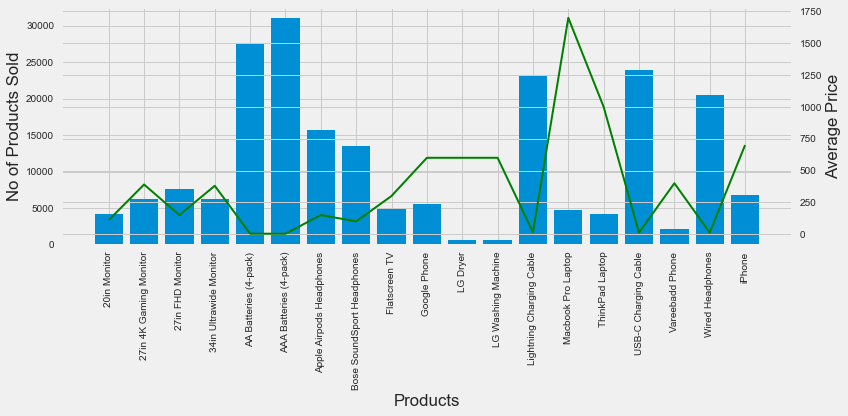

In [37]:
fig,ax = plt.subplots(figsize=(12,6))
ax2 = ax.twinx()
ax.bar(product_grp.index,product_grp.values)
ax2.plot(product_grp.index,average_product_price_grp.values,c="g",lw=2)
ax.set_xlabel("Products")
ax.set_ylabel("No of Products Sold")
ax2.set_ylabel("Average Price")
ax.set_xticklabels(product_grp.index,rotation=90)
plt.tight_layout()
plt.show()

## 4, What time is best for advertisement

In [38]:
%%time
df["Order Date"] = to_datetime(df["Order Date"])

Wall time: 55.9 s


In [39]:
df["Order Date"]

1        2019-01-01 21:01:00
2        2019-01-11 14:22:00
3        2019-01-31 19:57:00
4        2019-01-13 12:00:00
5        2019-01-21 14:37:00
                 ...        
185946   2019-12-06 18:05:00
185947   2019-12-19 07:35:00
185948   2019-12-21 21:06:00
185949   2019-12-26 22:24:00
185950   2019-12-11 13:25:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

In [40]:
df["Order Date"].dt

In [41]:
df["Hour"] = df["Order Date"].dt.hour
df["Minute"] = df["Order Date"].dt.minute

In [42]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Months,Profit,City,Hour,Minute
1,142996,AAA Batteries (4-pack),1,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",01,Jan,2.99,Boston MA,21,1
2,144300,Apple Airpods Headphones,1,150.00,2019-01-11 14:22:00,"532 River St, San Francisco, CA 94016",01,Jan,150.00,San Francisco CA,14,22
3,144299,27in 4K Gaming Monitor,1,389.99,2019-01-31 19:57:00,"942 North St, San Francisco, CA 94016",01,Jan,389.99,San Francisco CA,19,57
4,144298,Lightning Charging Cable,1,14.95,2019-01-13 12:00:00,"709 North St, Los Angeles, CA 90001",01,Jan,14.95,Los Angeles CA,12,0
5,144297,Flatscreen TV,1,300.00,2019-01-21 14:37:00,"437 Madison St, Atlanta, GA 30301",01,Jan,300.00,Atlanta GA,14,37


In [43]:
hour_grp = df.groupby("Hour")['Product'].count()

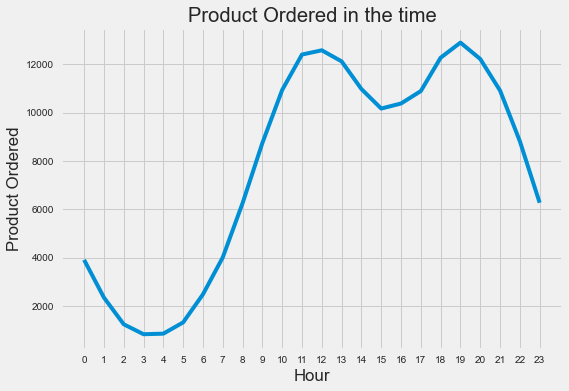

In [44]:
plt.xlabel("Hour")
plt.ylabel("Product Ordered")
plt.title("Product Ordered in the time")
plt.plot(hour_grp.index,hour_grp.values)
plt.xticks(hour_grp.index);

## 5, What product sold most together

In [45]:
filt = df["Order ID"].duplicated(keep=False)
df.loc[filt]
df2 = df.loc[filt,["Order ID","Product"]]

In [46]:
df2.head()

,Order ID,Product
69,144271,Lightning Charging Cable
70,144271,iPhone
130,144339,iPhone
132,144339,Wired Headphones
145,144344,USB-C Charging Cable


In [47]:
df2["Grouped"] = df2.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))

In [48]:
df2

,Order ID,Product,Grouped
69,144271,Lightning Charging Cable,"Lightning Charging Cable,iPhone"
70,144271,iPhone,"Lightning Charging Cable,iPhone"
130,144339,iPhone,"iPhone,Wired Headphones"
132,144339,Wired Headphones,"iPhone,Wired Headphones"
145,144344,USB-C Charging Cable,"USB-C Charging Cable,Google Phone"
...,...,...,...
185921,311715,Flatscreen TV,"Flatscreen TV,AAA Batteries (4-pack)"
185922,311715,AAA Batteries (4-pack),"Flatscreen TV,AAA Batteries (4-pack)"
185925,311697,USB-C Charging Cable,"USB-C Charging Cable,Vareebadd Phone"
185926,311697,Vareebadd Phone,"USB-C Charging Cable,Vareebadd Phone"


In [49]:
df2 = df2.drop_duplicates()

In [50]:
df2

,Order ID,Product,Grouped
69,144271,Lightning Charging Cable,"Lightning Charging Cable,iPhone"
70,144271,iPhone,"Lightning Charging Cable,iPhone"
130,144339,iPhone,"iPhone,Wired Headphones"
132,144339,Wired Headphones,"iPhone,Wired Headphones"
145,144344,USB-C Charging Cable,"USB-C Charging Cable,Google Phone"
...,...,...,...
185921,311715,Flatscreen TV,"Flatscreen TV,AAA Batteries (4-pack)"
185922,311715,AAA Batteries (4-pack),"Flatscreen TV,AAA Batteries (4-pack)"
185925,311697,USB-C Charging Cable,"USB-C Charging Cable,Vareebadd Phone"
185926,311697,Vareebadd Phone,"USB-C Charging Cable,Vareebadd Phone"


In [51]:
from itertools import combinations
from collections import Counter

In [52]:
# exmaple 
count = 0
counter = Counter()
for comb in df2["Grouped"]:
    if count<=5:
        result = combinations(comb.split(","),2)
        counter.update(result)
        count+=1

In [53]:
counter

Counter({('Lightning Charging Cable', 'iPhone'): 2,
         ('iPhone', 'Wired Headphones'): 2,
         ('USB-C Charging Cable', 'Google Phone'): 2})

In [54]:
combination_counter = Counter()
for comb in df2["Grouped"]:
    combination_counter.update(combinations(comb.split(","),2))   

In [55]:
products = []
values = []
for product,noOfTimes in combination_counter.most_common(15):
    products.append(product)
    values.append(noOfTimes)

In [56]:
values

[1120, 1112, 1041, 1015, 558, 533, 462, 434, 430, 416, 409, 358, 294, 263, 256]

In [57]:
product_pair = []
for product1,product2 in products:
    product_pair.append((f"{product1},{product2}"))

In [58]:
product_pair

['USB-C Charging Cable,Google Phone',
 'Lightning Charging Cable,iPhone',
 'iPhone,Lightning Charging Cable',
 'Google Phone,USB-C Charging Cable',
 'Wired Headphones,iPhone',
 'Wired Headphones,Google Phone',
 'iPhone,Wired Headphones',
 'Google Phone,Wired Headphones',
 'USB-C Charging Cable,Vareebadd Phone',
 'iPhone,Apple Airpods Headphones',
 'Apple Airpods Headphones,iPhone',
 'Vareebadd Phone,USB-C Charging Cable',
 'Wired Headphones,USB-C Charging Cable',
 'Bose SoundSport Headphones,Google Phone',
 'Google Phone,Bose SoundSport Headphones']

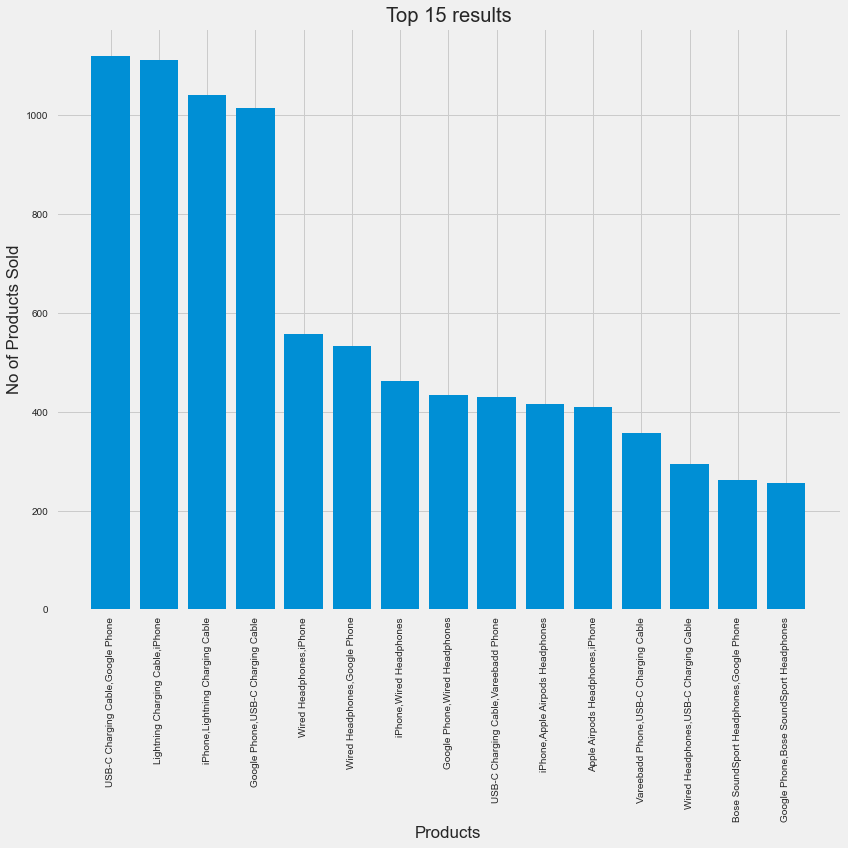

In [59]:
plt.figure(figsize=(12,12))
plt.style.use("fivethirtyeight")
plt.bar(product_pair,values)
plt.xlabel("Products")
plt.ylabel("No of Products Sold")
plt.title("Top 15 results")
plt.xticks(product_pair,rotation=90,size=10)
plt.tight_layout()
plt.show()

## yes we did ....